# Model comparison 

## Information criteria (likelihood, AIC, BIC)

### IC's using 5 initilizations of the EM algorithm

In [19]:
import pandas as pd
import numpy as np

chi2_weightedk2 = pd.read_csv('results/chi2_weighted_K2.csv')
chi2_weightedk3 = pd.read_csv('results/chi2_weighted_K3.csv')
chi2_weightedk4 = pd.read_csv('results/chi2_weighted_K4.csv')
chi2_weightedk5 = pd.read_csv('results/chi2_weighted_K5.csv')

gaussian = pd.read_csv('results/gaussian.csv')
gmm2cinit5 = pd.read_csv('results/gmm2c_init5_results.csv')
gmm3cinit5 = pd.read_csv('results/gmm3c_init5_results.csv')
nct = pd.read_csv('results/nct_fit.csv')

models = {
    'Gaussian': gaussian,
    'GMM-2c': gmm2cinit5,
    'GMM-3c': gmm3cinit5,
    'Chi2-K2': chi2_weightedk2,
    'Chi2-K3': chi2_weightedk3,
    'Chi2-K4': chi2_weightedk4,
    'Chi2-K5': chi2_weightedk5,
    'NCT': nct
}

def get_metric_cols(df):
    cols_lower = {c.lower(): c for c in df.columns}
    # log-likelihood is assumed consistent
    loglik_col = 'log-likelihood'
    aic_col = cols_lower.get('aic', None)
    bic_col = cols_lower.get('bic', None)
    return loglik_col, aic_col, bic_col

rows = []
n_stocks = nct.shape[0]  # assume all have same number of rows

for i in range(n_stocks):
    metrics = {}
    for name, df in models.items():
        loglik_col, aic_col, bic_col = get_metric_cols(df)
        metrics[name] = {
            'loglik': df.loc[i, loglik_col],
            'aic': df.loc[i, aic_col],
            'bic': df.loc[i, bic_col]
        }

    best_loglik = max(metrics, key=lambda m: metrics[m]['loglik'])
    best_aic = min(metrics, key=lambda m: metrics[m]['aic'])
    best_bic = min(metrics, key=lambda m: metrics[m]['bic'])

    rows.append({
        'stock': i + 1,
        'best_loglik_model': best_loglik,
        'best_aic_model': best_aic,
        'best_bic_model': best_bic
    })

best_models = pd.DataFrame(rows)
print(best_models)

best_models.to_csv('results/best_models_loglik_aic_bic_init5.csv', index=False)


    stock best_loglik_model best_aic_model best_bic_model
0       1               NCT            NCT            NCT
1       2            GMM-3c         GMM-3c         GMM-3c
2       3            GMM-3c            NCT            NCT
3       4               NCT            NCT            NCT
4       5            GMM-3c         GMM-3c            NCT
5       6               NCT            NCT            NCT
6       7               NCT            NCT            NCT
7       8               NCT            NCT            NCT
8       9               NCT            NCT            NCT
9      10           Chi2-K4        Chi2-K4        Chi2-K4
10     11            GMM-3c         GMM-3c            NCT
11     12               NCT            NCT            NCT
12     13               NCT            NCT            NCT
13     14               NCT            NCT            NCT
14     15            GMM-3c         GMM-3c         GMM-3c
15     16            GMM-3c         GMM-3c            NCT
16     17     

### IC's using 150 initializations of the EM algorithm

In [20]:
import pandas as pd
import numpy as np

chi2_weightedk2 = pd.read_csv('results/chi2_weighted_K2.csv')
chi2_weightedk3 = pd.read_csv('results/chi2_weighted_K3.csv')
chi2_weightedk4 = pd.read_csv('results/chi2_weighted_K4.csv')
chi2_weightedk5 = pd.read_csv('results/chi2_weighted_K5.csv')

gaussian = pd.read_csv('results/gaussian.csv')
gmm2cinit150 = pd.read_csv('results/gmm2c_init150_results.csv')
gmm3cinit150 = pd.read_csv('results/gmm3c_init150_results.csv')
nct = pd.read_csv('results/nct_fit.csv')

models = {
    'Gaussian': gaussian,
    'GMM-2c': gmm2cinit150,
    'GMM-3c': gmm3cinit150,
    'Chi2-K2': chi2_weightedk2,
    'Chi2-K3': chi2_weightedk3,
    'Chi2-K4': chi2_weightedk4,
    'Chi2-K5': chi2_weightedk5,
    'NCT': nct
}

def get_metric_cols(df):
    cols_lower = {c.lower(): c for c in df.columns}
    # log-likelihood is assumed consistent
    loglik_col = 'log-likelihood'
    aic_col = cols_lower.get('aic', None)
    bic_col = cols_lower.get('bic', None)
    return loglik_col, aic_col, bic_col

rows = []
n_stocks = nct.shape[0]  # assume all have same number of rows

for i in range(n_stocks):
    metrics = {}
    for name, df in models.items():
        loglik_col, aic_col, bic_col = get_metric_cols(df)
        metrics[name] = {
            'loglik': df.loc[i, loglik_col],
            'aic': df.loc[i, aic_col],
            'bic': df.loc[i, bic_col]
        }

    best_loglik = max(metrics, key=lambda m: metrics[m]['loglik'])
    best_aic = min(metrics, key=lambda m: metrics[m]['aic'])
    best_bic = min(metrics, key=lambda m: metrics[m]['bic'])

    rows.append({
        'stock': i + 1,
        'best_loglik_model': best_loglik,
        'best_aic_model': best_aic,
        'best_bic_model': best_bic
    })

best_models = pd.DataFrame(rows)
print(best_models)

best_models.to_csv('results/best_models_loglik_aic_bic_init150.csv', index=False)


    stock best_loglik_model best_aic_model best_bic_model
0       1            GMM-3c         GMM-3c         GMM-3c
1       2            GMM-3c         GMM-3c         GMM-3c
2       3            GMM-3c            NCT            NCT
3       4            GMM-3c         GMM-3c            NCT
4       5            GMM-3c         GMM-3c         GMM-3c
5       6            GMM-3c         GMM-3c         GMM-3c
6       7            GMM-3c         GMM-3c         GMM-3c
7       8            GMM-3c         GMM-3c         GMM-3c
8       9            GMM-3c         GMM-3c         GMM-3c
9      10            GMM-3c         GMM-3c         GMM-3c
10     11            GMM-3c         GMM-3c         GMM-3c
11     12            GMM-3c         GMM-3c         GMM-3c
12     13               NCT            NCT            NCT
13     14            GMM-3c         GMM-3c            NCT
14     15            GMM-3c         GMM-3c         GMM-3c
15     16            GMM-3c         GMM-3c            NCT
16     17     

## Value-at-Risk estimation

For the comparison of estimated VaR's versus the empirical VaR of each stock, we use the Gaussian mixture densities from using 5 initlizations to avoid degenerate distributions

In [21]:


chi2_weightedk2_var = pd.read_csv('results/ValueAtRiskResults/chi2_weighted_K2_var.csv')
chi2_weightedk3_var = pd.read_csv('results/ValueAtRiskResults/chi2_weighted_K3_var.csv')
chi2_weightedk4_var = pd.read_csv('results/ValueAtRiskResults/chi2_weighted_K4_var.csv')
chi2_weightedk5_var = pd.read_csv('results/ValueAtRiskResults/chi2_weighted_K5_var.csv')

gaussian_var = pd.read_csv('results/ValueAtRiskResults/gaussian_var.csv')
gmm2cinit5_var = pd.read_csv('results/ValueAtRiskResults/gmm2c_init5_var.csv')
gmm3cinit5_var = pd.read_csv('results/ValueAtRiskResults/gmm3c_init5var.csv')
nct_var = pd.read_csv('results/ValueAtRiskResults/nct_var.csv')


emp_col = "empirical var" if "empirical var" in gaussian_var.columns else "empirical-var"
empirical_var = gaussian_var[emp_col].values

if "stock" in gaussian_var.columns:
    stock = gaussian_var["stock"].astype(int).values
else:
    stock = np.arange(1, len(gaussian_var) + 1)

var_table = pd.DataFrame({
    "stock": stock,
    "empirical var": empirical_var,
    "Gaussian": gaussian_var["estimated-var"].values,
    "GMM-2c": gmm2cinit5_var["estimated-var"].values,
    "GMM-3c": gmm3cinit5_var["estimated-var"].values,
    "NCT": nct_var["estimated-var"].values,
    "Chi2-weighted K=2": chi2_weightedk2_var["estimated-var"].values,
    "Chi2-weighted K=3": chi2_weightedk3_var["estimated-var"].values,
    "Chi2-weighted K=4": chi2_weightedk4_var["estimated-var"].values,
    "Chi2-weighted K=5": chi2_weightedk5_var["estimated-var"].values,
})

var_table.head(25)


,stock,empirical var,Gaussian,GMM-2c,GMM-3c,NCT,Chi2-weighted K=2,Chi2-weighted K=3,Chi2-weighted K=4,Chi2-weighted K=5
0,1,-7.530826,-7.091160,-9.782952,-7.687894,-7.643208,-8.687548,-8.957606,-7.428675,-7.398779
1,2,-6.073413,-5.159916,-7.067859,-6.422673,-6.650370,-6.895903,-6.221448,-6.284569,-6.349234
2,3,-5.832174,-4.907490,-6.850103,-5.827754,-5.533659,-6.526330,-6.043683,-5.782803,-5.717769
3,4,-5.722648,-4.694770,-5.967295,-5.902833,-5.554561,-6.751765,-5.952811,-5.666158,-5.616448
4,5,-4.180309,-3.836294,-5.069127,-4.350168,-4.366167,-5.329281,-5.176171,-4.475768,-4.465881
5,6,-5.029871,-4.351234,-5.666392,-5.399677,-5.128575,-5.968639,-5.197115,-5.138051,-5.080988
6,7,-5.457216,-4.623831,-6.196641,-5.416066,-5.520725,-5.971818,-5.729946,-5.486826,-5.364701
7,8,-5.010827,-4.050948,-5.392138,-5.448932,-4.988673,-5.604027,-4.927365,-4.956954,-4.831519
8,9,-6.847457,-5.610880,-7.493762,-6.996976,-6.724333,-7.942646,-6.994784,-6.851970,-6.742007
9,10,-3.697273,-3.118508,-3.944630,-3.931518,-3.765723,-4.313224,-3.688640,-3.743583,-3.729479


## ignore (gaussian degenerate pdf)

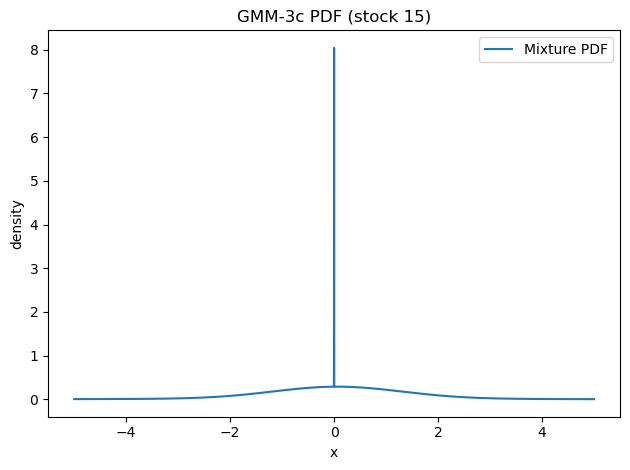

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# --- params (from your row) ---
pi  = np.array([8.591886e-01, 1.187900e-01, 2.202146e-02])
mu  = np.array([6.283374e-02, -2.758969e-01, 7.140050e-12])
sig = np.array([1.233604e+00, 3.680298e+00, 1.000000e-03])

def gmm_pdf(x, pi, mu, sig):
    # x: (n,) -> returns (n,)
    return (pi[0]*norm.pdf(x, loc=mu[0], scale=sig[0]) +
            pi[1]*norm.pdf(x, loc=mu[1], scale=sig[1]) +
            pi[2]*norm.pdf(x, loc=mu[2], scale=sig[2]))

# grid: wide enough to see the heavy component; adjust as you like
x = np.linspace(-5, 5, 10000)

pdf_mix = gmm_pdf(x, pi, mu, sig)

plt.figure()
plt.plot(x, pdf_mix, label="Mixture PDF")
# optional: show each component too
#plt.plot(x, pi[0]*norm.pdf(x, mu[0], sig[0]), label="pi1*N(mu1,s1)")
#plt.plot(x, pi[1]*norm.pdf(x, mu[1], sig[1]), label="pi2*N(mu2,s2)")
#plt.plot(x, pi[2]*norm.pdf(x, mu[2], sig[2]), label="pi3*N(mu3,s3)")
plt.xlabel("x")
plt.ylabel("density")
plt.title("GMM-3c PDF (stock 15)")
plt.legend()
plt.tight_layout()
plt.show()


## Value-at-Risk comparison